In [86]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [87]:
df=pd.read_csv('Covid-19_Fake_News.csv')
df.head()

,Date Posted,Link,Text,Region,Label
0,2/11/2020,https://twitter.com/the_hindu/status/122725962...,Just in: Novel coronavirus named 'Covid-19': U...,India,1
1,2/12/2020,https://twitter.com/ndtv/status/12274908434742...,WHO officially names #coronavirus as Covid-19....,India,1
2,2/12/2020,https://twitter.com/the_hindu/status/122744471...,"The #UN #health agency announced that ""COVID-1...",India,1
3,2/14/20,https://twitter.com/IndiaToday/status/12282764...,The Indian Embassy in Tokyo has said that one ...,India,1
4,2/15/20,https://twitter.com/the_hindu/status/122854247...,Ground Zero | How Kerala used its experience i...,India,1


In [88]:
df.drop(['Date Posted','Link','Region'],axis = 1,inplace = True)
df.head()

,Text,Label
0,Just in: Novel coronavirus named 'Covid-19': U...,1
1,WHO officially names #coronavirus as Covid-19....,1
2,"The #UN #health agency announced that ""COVID-1...",1
3,The Indian Embassy in Tokyo has said that one ...,1
4,Ground Zero | How Kerala used its experience i...,1


In [89]:
from random import shuffle
from sklearn.utils import shuffle
df = shuffle(df,random_state=1)
df.head()

,Text,Label
6244,You have to shave off your beard and moustach...,0
3067,In an embattled industry stepping back out int...,1
4393,Ibuprofen can be an aggravating factor; one s...,0
3391,"""The drug itself is very widely available... a...",1
6227,Three red tick marks on WhatsApp means the go...,0


In [90]:
df['Class'] = df.apply(lambda x:"fake" if x['Label']== 0 else "true", axis=1)
df.head()

,Text,Label,Class
6244,You have to shave off your beard and moustach...,0,fake
3067,In an embattled industry stepping back out int...,1,true
4393,Ibuprofen can be an aggravating factor; one s...,0,fake
3391,"""The drug itself is very widely available... a...",1,true
6227,Three red tick marks on WhatsApp means the go...,0,fake


In [91]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from nltk.stem.porter import * 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
#Removing links
df['Text'] = df['Text'].str.replace(r"http\S+", "") 
df.head()

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_260\2185292022.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace(r"http\S+", "")


,Text,Label,Class
6244,You have to shave off your beard and moustach...,0,fake
3067,In an embattled industry stepping back out int...,1,true
4393,Ibuprofen can be an aggravating factor; one s...,0,fake
3391,"""The drug itself is very widely available... a...",1,true
6227,Three red tick marks on WhatsApp means the go...,0,fake


In [93]:
#Lemmatization

def preprocessing(ds: pd.Series) -> pd.Series:
    for i in range(len(ds)):
        words=re.sub('[^a-zA-Z]', ' ', ds[i])
        words = (words.lower()).split()
        words = [w for w in words if not w in set(stopwords.words('english'))]
        lem=WordNetLemmatizer()
        words=[lem.lemmatize(w) for w in words]
        words = ' '.join(words)
        ds[i]=words
    return ds

df["Text"]=preprocessing(df["Text"])
df.head()

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_260\978807108.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[i]=words


,Text,Label,Class
6244,shave beard moustache completely mouth mask ef...,0,fake
3067,embattled industry stepping back world changed...,1,true
4393,ibuprofen aggravating factor one use paracetam...,0,fake
3391,drug widely available extremely cheap oxford u...,1,true
6227,three red tick mark whatsapp mean government i...,0,fake


In [94]:
#Text Tokenization and Normalization

df['Text'] = df['Text'].apply(lambda x: x.split())
df.head()

,Text,Label,Class
6244,"[shave, beard, moustache, completely, mouth, m...",0,fake
3067,"[embattled, industry, stepping, back, world, c...",1,true
4393,"[ibuprofen, aggravating, factor, one, use, par...",0,fake
3391,"[drug, widely, available, extremely, cheap, ox...",1,true
6227,"[three, red, tick, mark, whatsapp, mean, gover...",0,fake


In [95]:
#Stitch these tokens back together

df['Text'] = df['Text'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,Text,Label,Class
6244,shave beard moustache completely mouth mask ef...,0,fake
3067,embattled industry stepping back world changed...,1,true
4393,ibuprofen aggravating factor one use paracetam...,0,fake
3391,drug widely available extremely cheap oxford u...,1,true
6227,three red tick mark whatsapp mean government i...,0,fake


In [96]:
#Removing small words

df['Text'] = df['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,Text,Label,Class
6244,shave beard moustache completely mouth mask ef...,0,fake
3067,embattled industry stepping back world changed...,1,true
4393,ibuprofen aggravating factor paracetamol instead,0,fake
3391,drug widely available extremely cheap oxford u...,1,true
6227,three tick mark whatsapp mean government initi...,0,fake


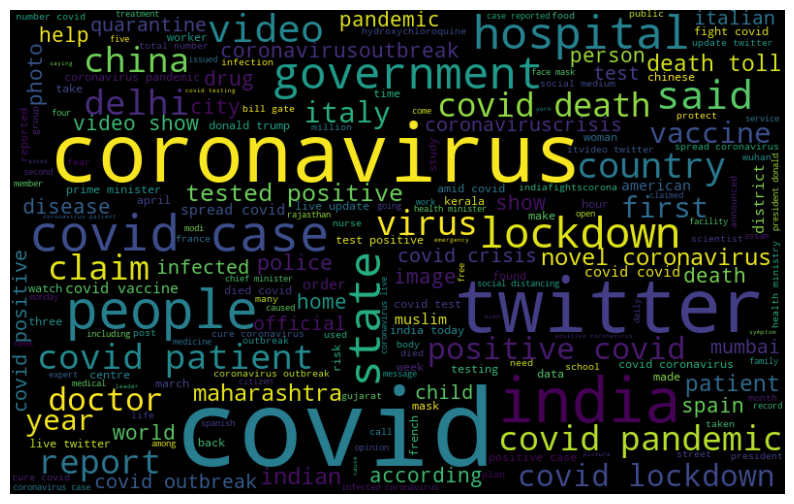

In [97]:
all_words = ' '.join([text for text in df['Text']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

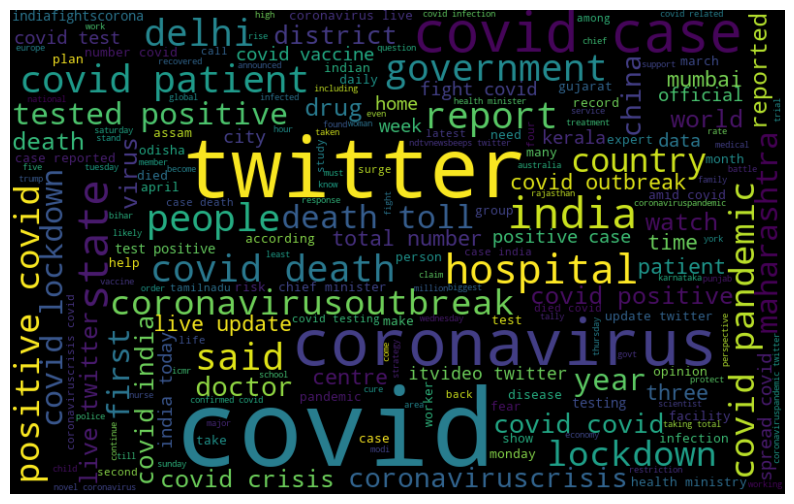

In [98]:
positive_words =' '.join([text for text in df['Text'][df['Label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

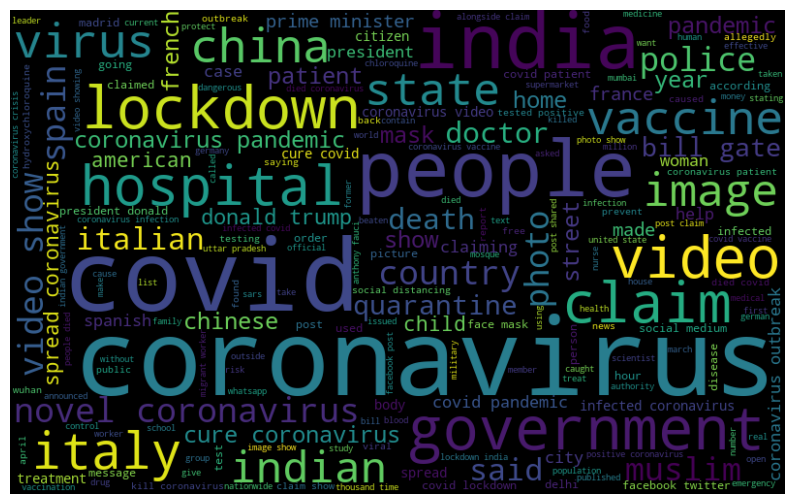

In [99]:
depressive_words =' '.join([text for text in df['Text'][df['Label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [100]:
#Model Training

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df['Text'])
cv.shape

(7588, 10843)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(cv,df['Label'] , test_size=.3,stratify=df['Label'], random_state=42)

In [103]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(2277,)

In [104]:
df.head()

,Text,Label,Class
6244,shave beard moustache completely mouth mask ef...,0,fake
3067,embattled industry stepping back world changed...,1,true
4393,ibuprofen aggravating factor paracetamol instead,0,fake
3391,drug widely available extremely cheap oxford u...,1,true
6227,three tick mark whatsapp mean government initi...,0,fake


In [105]:
df.drop(['Label'],axis = 1,inplace = True)
df.head()

,Text,Class
6244,shave beard moustache completely mouth mask ef...,fake
3067,embattled industry stepping back world changed...,true
4393,ibuprofen aggravating factor paracetamol instead,fake
3391,drug widely available extremely cheap oxford u...,true
6227,three tick mark whatsapp mean government initi...,fake


In [106]:
#dowload csv

df.to_csv('Shuffled_data.csv')

In [107]:
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [108]:
#Training Data

In [109]:
#SVM(Train)

svc = svm.SVC()
svc.fit(X_train,y_train)
y_det_svc = svc.predict(X_train)

print(accuracy_score(y_det_svc,y_train))
score_svm = round(accuracy_score(y_det_svc,y_train)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")

print ('Precesion is', precision_score(y_train,y_det_svc)*100)

print ('Recall is', recall_score(y_train,y_det_svc)*100)

print ('F1 score is', f1_score(y_train,y_det_svc)*100)

0.9873846733195255
The accuracy score achieved using SVM is: 98.74 %
Precesion is 97.64359351988217
Recall is 99.88700564971752
F1 score is 98.75256004468443


In [110]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_det_svc)
cm

array([[2592,   64],
       [   3, 2652]], dtype=int64)

<AxesSubplot:>

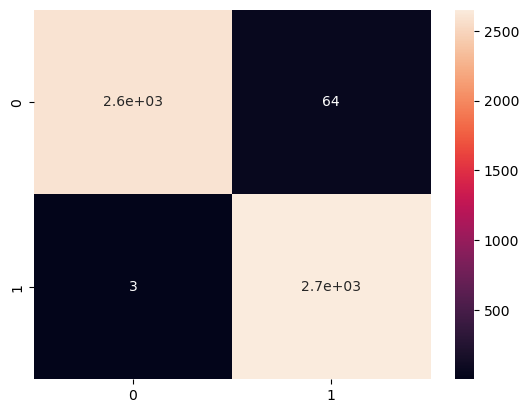

In [111]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True)

In [112]:
#Test Data

In [113]:
#SVM(Test)

svc = svm.SVC()
svc.fit(X_train,y_train)
y_det_svc = svc.predict(X_test)

print(accuracy_score(y_det_svc,y_test))
score_svm = round(accuracy_score(y_det_svc,y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")

print ('Precesion is', precision_score(y_test,y_det_svc)*100)

print ('Recall is', recall_score(y_test,y_det_svc)*100)

print ('F1 score is', f1_score(y_test,y_det_svc)*100)

0.932806324110672
The accuracy score achieved using SVM is: 93.28 %
Precesion is 89.2430278884462
Recall is 98.41827768014059
F1 score is 93.60635185959046


In [114]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_det_svc)
cm

array([[1004,  135],
       [  18, 1120]], dtype=int64)

<AxesSubplot:>

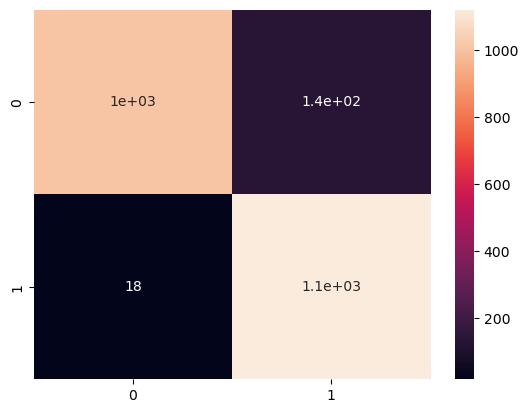

In [115]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True)

In [116]:
# TFidf Vectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [117]:
#Validate on an unseen datapoint

In [118]:
#def preprocessing(ds: pd.Series) -> pd.Series:
 #   for i in range(len(ds)):        
  #      review = re.sub('[^a-zA-Z]', ' ', ds[i])
   #     review = review.lower()
    #    review = review.split()
    
     #   review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
      #  review = ' '.join(review)
       # ds[i]=review
   # return ds

   # val = tfidf_v.transform([review]).toarray()
   # svc.predict(val)

In [119]:
#val = tfidf_v.transform([review]).toarray()

In [120]:
#svc.predict(val)

In [121]:
#Save model and vectorizer

In [122]:
import pickle

In [123]:
pickle.dump(svc, open('modelsvm.pkl', 'wb'))

In [124]:
pickle.dump(cv, open('countvect.pkl', 'wb'))

In [125]:
#Load model and vectorizer to predict the previous datapoint

In [126]:
joblib_model = pickle.load(open('modelsvm.pkl', 'rb'))

In [127]:
joblib_vect = pickle.load(open('countvect.pkl', 'rb'))

In [128]:
def preprocessing(ds: pd.Series) -> pd.Series:
    for i in range(len(ds)):        
        review = re.sub('[^a-zA-Z]', ' ', ds[i])
        review = review.lower()
        review = review.split()
    
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        ds[i]=review
    return ds

    val_pkl = joblib_vect.transform([review]).toarray()
    joblib_model.predict(val_pkl)